In [215]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


1. Generate some Data
    
    Generate 100 dots
    

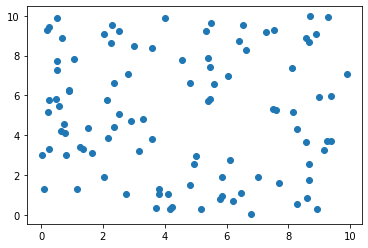

In [216]:
#Create Random Points in R^2, between 0,0 and 10,10 
x1=10*np.random.random(100)
x2=10*np.random.random(100)
plt.scatter(x1, x2)
plt.show()


2. Choose a Target Function

    Function chosen: 0.18 * x1 - x2 + 3.75 = 0
    
    Evaluate each point
    

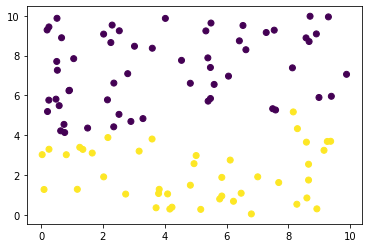

In [353]:
m=0.18
n=3.75

y=[]
for pos, x1_elem in enumerate(x1):
    x2_elem=x2[pos]
    res= m*x1_elem - x2_elem + n
    if(res>=0):
        y.append(1)
    else:
        y.append(-1)
        
plt.scatter(x1, x2, c=y)
plt.show()


3. Plot Your Data

    Lets see the data
    
    Lets plot also the line
    

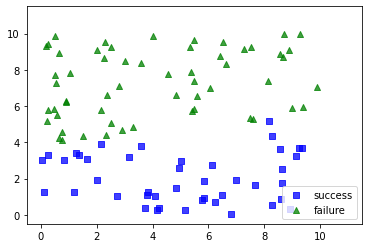

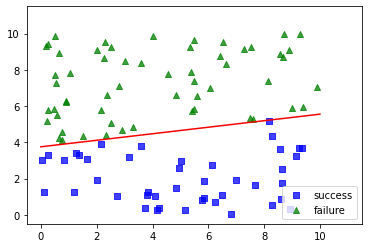

In [354]:
#First let separate the success form failure, to make it easier to plot
x1_success=[]
x2_success=[]

x1_failure=[]
x2_failure=[]

for pos, y_elem in enumerate(y):
    if(y_elem==1):
        x1_success.append(x1[pos])
        x2_success.append(x2[pos])
    else:
        x1_failure.append(x1[pos])
        x2_failure.append(x2[pos])

#Plot the points into the graph
success=plt.scatter(x1_success, x2_success, c="b", marker="s",label="success",alpha=0.75)
failure=plt.scatter(x1_failure, x2_failure, c="g", marker="^",label="failure",alpha=0.75)
plt.legend()
plt.xlim(-0.5,11.5)
plt.ylim(-0.5,11.5)
plt.show()

#Create points to draw the line
#Point 1: 
p1x=0
p1y=m*p1x + n
#Point 2:
p2x=10
p2y=m*p2x + n

#Now plot the graph with the line
success=plt.scatter(x1_success, x2_success, c="b", marker="s",label="success",alpha=0.75)
failure=plt.scatter(x1_failure, x2_failure, c="g", marker="^",label="failure",alpha=0.75)
line=plt.plot([p1x,p2x],[p1y,p2y],c="r")
plt.legend()
plt.xlim(-0.5,11.5)
plt.ylim(-0.5,11.5)
plt.show()


4. Create the Training Data

    Create a data frame with 3 columns
    

In [355]:
dic={'x1': x1, 'x2': x2, 'y':y}
df=pd.DataFrame(data=dic)
df

,x1,x2,y
0,6.119689,2.749771,1
1,4.021006,9.873070,-1
2,0.193411,9.291140,-1
3,3.821554,1.279598,1
4,0.093806,1.271152,1
...,...,...,...
95,5.848003,1.878807,1
96,9.370597,3.694973,1
97,4.235536,0.380350,1
98,5.395946,7.887902,-1



5. Initialize the Perceptron

    𝑓(𝑥1, 𝑥2) = 𝑠𝑖𝑔𝑛(𝑤0 + 𝑤1 ∙ 𝑥1 + 𝑤2 ∙ 𝑥2)
    

In [356]:
#Create weights W0
w=[0,0,0] #(w1,w2,w3)



6. Classify the Data

    Make the prediction
    
    Execute the perceptron for all the data
    

In [357]:
#function that implemet the perceptron
def perceptron(x1_elem,x2_elem):
    pred_1=w[0] + w[1]*x1_elem + w[2]*x2_elem
    if(pred_1>=0):
        return (1)
    else:
        return (-1)

In [358]:
#Execute the perceptron
predicted = df.apply(lambda elem: perceptron(elem['x1'],elem['x2']),axis=1)
print(predicted)

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int64


In [359]:
#Add the predicted values to the dataframe
df["predicted"]=predicted
df

,x1,x2,y,predicted
0,6.119689,2.749771,1,1
1,4.021006,9.873070,-1,1
2,0.193411,9.291140,-1,1
3,3.821554,1.279598,1,1
4,0.093806,1.271152,1,1
...,...,...,...,...
95,5.848003,1.878807,1,1
96,9.370597,3.694973,1,1
97,4.235536,0.380350,1,1
98,5.395946,7.887902,-1,1



7. Generate the Confusion Matrix

    Evaluate the Prediction with the Expected result
    
    Execute the evaluation
    
    Create the Confusion Matrix
    

In [360]:
#Compares the expected result with the prediction. 
# 0: observations correctly predicted to be +1
# 1: observations incorrectly predicted to be +1
# 2: observations incorrectly predicted to be −1
# 3: observations correctly predicted to be −1
def eval_res(y_elem, predicted_elem):
    if(y_elem==1):
        if(predicted_elem==1):
            return (0)
        else:
            return (2)
    else:
        if(predicted_elem==1):
            return (1)
        else:
            return (3)

In [361]:
#Execute the evaluation and add it to the dataframe
result = df.apply(lambda elem: eval_res(elem['y'],elem['predicted']),axis=1)
df["result"]=result
df

,x1,x2,y,predicted,result
0,6.119689,2.749771,1,1,0
1,4.021006,9.873070,-1,1,1
2,0.193411,9.291140,-1,1,1
3,3.821554,1.279598,1,1,0
4,0.093806,1.271152,1,1,0
...,...,...,...,...,...
95,5.848003,1.878807,1,1,0
96,9.370597,3.694973,1,1,0
97,4.235536,0.380350,1,1,0
98,5.395946,7.887902,-1,1,1


In [362]:
#Count the number of each cases
case_count=df.result.value_counts()

#If an option does not appear we catch the exception, and we add a 0
res=[]
try:
    res.append(case_count.at[0])
except KeyError:
    res.append(0)
    
try:
    res.append(case_count.at[1])
except KeyError:
    res.append(0)
    
try:
    res.append(case_count.at[2])
except KeyError:
    res.append(0)
    
try:
    res.append(case_count.at[3])
except KeyError:
    res.append(0)


#Calculate the accuracy
accuracy= (res[0]+res[3]) / (res[0]+res[1]+res[2]+res[3]) * 100



In [363]:
#Print the Confusion Matrix and the Accuracy
print(res)
print("|----------------|-----------------------|-----------------------|")
print("|\t\t |\t Actual +1\t |\t Actual −1\t |")
print("|----------------|-----------------------|-----------------------|")
print("|Predicted +1 \t |\t " +str(res[0])+ "\t\t |\t " + str(res[1])+"\t\t |")
print("|----------------|-----------------------|-----------------------|")
print("|Predicted -1 \t |\t " +str(res[2])+ "\t\t |\t " + str(res[3])+"\t\t |")
print("|----------------|-----------------------|-----------------------|")
print("")
print("Accuracy: " + str(accuracy) + " %")

[43, 57, 0, 0]
|----------------|-----------------------|-----------------------|
|		 |	 Actual +1	 |	 Actual −1	 |
|----------------|-----------------------|-----------------------|
|Predicted +1 	 |	 43		 |	 57		 |
|----------------|-----------------------|-----------------------|
|Predicted -1 	 |	 0		 |	 0		 |
|----------------|-----------------------|-----------------------|

Accuracy: 43.0 %



8. Evaluate the Result.

    The accuracy is not at 100 %
    
    We need to continue, and modify the weights
    


9. Update the Weights
    
    Pick one random observation form the misclassified observations
    
    Use that observation to update the Weights
    

In [364]:
#If the prediction is correct return a True. if is misclassified return a False
def correct(result):
    if(result==0 or result==3): # Result is 0 if The correct value is 1 and predicted is 1. Result is 3 if The correct value is 0 and predicted is 0
        return (True)
    else:
        return (False)
#Aply the function to the dataframe
correct_col=df.apply(lambda elem: correct(elem['result']),axis=1)
df["correct"]=correct_col
print(df)

#Pick One random Observation from the misclassified observations
incorrect_Pred=df.loc[df['correct']==False]
random_Obs=incorrect_Pred.sample()
random_Obs

          x1        x2  y  predicted  result  correct
0   6.119689  2.749771  1          1       0     True
1   4.021006  9.873070 -1          1       1    False
2   0.193411  9.291140 -1          1       1    False
3   3.821554  1.279598  1          1       0     True
4   0.093806  1.271152  1          1       0     True
..       ...       ... ..        ...     ...      ...
95  5.848003  1.878807  1          1       0     True
96  9.370597  3.694973  1          1       0     True
97  4.235536  0.380350  1          1       0     True
98  5.395946  7.887902 -1          1       1    False
99  0.900201  6.237048 -1          1       1    False

[100 rows x 6 columns]


,x1,x2,y,predicted,result,correct
27,2.530195,9.250362,-1,1,1,False


In [365]:
#Update the Weights
elem=random_Obs.iloc[0]
w[0]=w[0]+1*elem['y']
w[1]=w[1]+elem['x1']*elem['y']
w[2]=w[2]+elem['x2']*elem['y']
print(w)


[-1, -2.530194756036077, -9.250361757219832]



10. Classify the Data.

    Run the Perceptron Again
    
11. Generate the Confusion Matrix
    
    Generate the Confusion Matrix Again
    
    Evaluate the Result. 
    
    If 100% Acuracy End
    
    If not 100% Acuracy Update the Weights. And Reiterate
    

In [366]:

historic_Acurracy=[]
historic_Acurracy.append(accuracy)


for x in range(10000):
    print ("Loop Number: " + str(x+1))

    #Execute the perceptron
    predicted = df.apply(lambda elem: perceptron(elem['x1'],elem['x2']),axis=1)
    #print(predicted)
    #Add the predicted values to the dataframe
    df["predicted"]=predicted
    #print(df)

    #Execute the evaluation and add it to the dataframe
    result = df.apply(lambda elem: eval_res(elem['y'],elem['predicted']),axis=1)
    df["result"]=result
    #print(df)

    #Count the number of each cases
    case_count=df.result.value_counts()
    #If an option does not appear we catch the exception, and we add a 0
    res=[]
    try:
        res.append(case_count.at[0])
    except KeyError:
        res.append(0)

    try:
        res.append(case_count.at[1])
    except KeyError:
        res.append(0)

    try:
        res.append(case_count.at[2])
    except KeyError:
        res.append(0)

    try:
        res.append(case_count.at[3])
    except KeyError:
        res.append(0)


    #Calculate the accuracy
    accuracy= (res[0]+res[3]) / (res[0]+res[1]+res[2]+res[3]) * 100
    
    #Print the Confusion Matrix and the Accuracy
    print(res)
    print("|----------------|-----------------------|-----------------------|")
    print("|\t\t |\t Actual +1\t |\t Actual −1\t |")
    print("|----------------|-----------------------|-----------------------|")
    print("|Predicted +1 \t |\t " +str(res[0])+ "\t\t |\t " + str(res[1])+"\t\t |")
    print("|----------------|-----------------------|-----------------------|")
    print("|Predicted -1 \t |\t " +str(res[2])+ "\t\t |\t " + str(res[3])+"\t\t |")
    print("|----------------|-----------------------|-----------------------|")
    print("")
    print("Accuracy: " + str(accuracy) + " %")
    
    historic_Acurracy.append(accuracy)
    
    #If Accuracy is 100 % we exit the loop. If not we update the Weights
    if(accuracy==100):
        break
    else:
        #Aply the function to the dataframe
        correct_col=df.apply(lambda elem: correct(elem['result']),axis=1)
        df["correct"]=correct_col
        #print(df)

        #Pick One random Observation from the misclassified observations
        incorrect_Pred=df.loc[df['correct']==False]
        random_Obs=incorrect_Pred.sample()
        #random_Obs

        #Update the Weights
        elem=random_Obs.iloc[0]
        w[0]=w[0]+1*elem['y']
        w[1]=w[1]+elem['x1']*elem['y']
        w[2]=w[2]+elem['x2']*elem['y']
        print("weights:" + str(w))

Loop Number: 1
[0, 0, 43, 57]
|----------------|-----------------------|-----------------------|
|		 |	 Actual +1	 |	 Actual −1	 |
|----------------|-----------------------|-----------------------|
|Predicted +1 	 |	 0		 |	 0		 |
|----------------|-----------------------|-----------------------|
|Predicted -1 	 |	 43		 |	 57		 |
|----------------|-----------------------|-----------------------|

Accuracy: 56.99999999999999 %
weights:[0, -2.496717579368007, -6.227591211853603]
Loop Number: 2
[0, 0, 43, 57]
|----------------|-----------------------|-----------------------|
|		 |	 Actual +1	 |	 Actual −1	 |
|----------------|-----------------------|-----------------------|
|Predicted +1 	 |	 0		 |	 0		 |
|----------------|-----------------------|-----------------------|
|Predicted -1 	 |	 43		 |	 57		 |
|----------------|-----------------------|-----------------------|

Accuracy: 56.99999999999999 %
weights:[1, 5.192799935713247, -4.607054707696527]
Loop Number: 3
[35, 14, 8, 43]
|-------

[43.0, 56.99999999999999, 56.99999999999999, 78.0, 56.99999999999999, 84.0, 71.0, 78.0, 87.0, 85.0, 69.0, 56.99999999999999, 66.0, 77.0, 88.0, 78.0, 56.99999999999999, 87.0, 88.0, 60.0, 68.0, 74.0, 83.0, 43.0, 81.0, 62.0, 86.0, 67.0, 88.0, 85.0, 56.99999999999999, 71.0, 80.0, 75.0, 71.0, 86.0, 76.0, 84.0, 86.0, 75.0, 89.0, 86.0, 87.0, 74.0, 77.0, 89.0, 86.0, 73.0, 79.0, 89.0, 90.0, 87.0, 56.00000000000001, 85.0, 89.0, 82.0, 82.0, 72.0, 82.0, 71.0, 76.0, 81.0, 80.0, 76.0, 87.0, 85.0, 81.0, 91.0, 86.0, 81.0, 89.0, 89.0, 71.0, 90.0, 80.0, 80.0, 89.0, 67.0, 80.0, 85.0, 89.0, 96.0, 65.0, 85.0, 91.0, 85.0, 71.0, 89.0, 89.0, 75.0, 79.0, 84.0, 63.0, 81.0, 91.0, 69.0, 77.0, 97.0, 66.0, 67.0, 81.0, 88.0, 81.0, 82.0, 89.0, 92.0, 81.0, 91.0, 86.0, 82.0, 90.0, 95.0, 65.0, 78.0, 92.0, 96.0, 67.0, 76.0, 96.0, 67.0, 92.0, 95.0, 68.0, 86.0, 91.0, 67.0, 99.0, 74.0, 97.0, 78.0, 75.0, 89.0, 99.0, 51.0, 94.0, 95.0, 77.0, 91.0, 87.0, 93.0, 90.0, 91.0, 94.0, 73.0, 92.0, 95.0, 79.0, 89.0, 99.0, 54.0, 88.0, 81

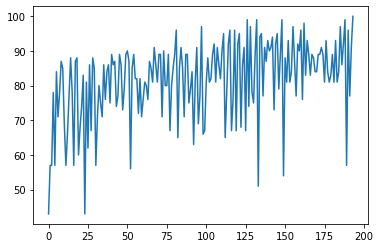

In [367]:
#Lets see the evolution
print(historic_Acurracy)
plt.plot(historic_Acurracy)
plt.show()


12. Deploy the Model

    Output Functions
    
    Plot Functions
    
    Generate new Points (30)
    
    Test the new points
    
    Plot New Points

weights:[59, 3.1817437492678384, -16.341259767443503]
Approximated target function: 59 + 3.1817437492678384 * x1 + -16.341259767443503 * x2 = 0
Original function: 3.75 + 0.18 * x1 +  x2 = 0


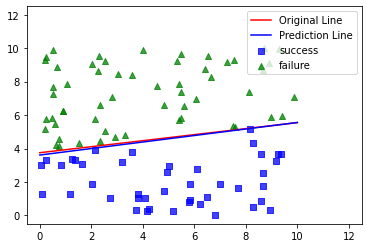

In [374]:
#Print the weights
print("weights:" + str(w))
print("Approximated target function: " + str(w[0]) + " + " + str(w[1]) + " * x1 + " + str(w[2]) + " * x2 = 0")
print("Original function: " + str(n) + " + " + str(m) + " * x1 + " + " x2 = 0")

#Create points to draw the line
#Point 1: 
p1x_new=0
p1y_new=( - w[1]*p1x_new - w[0])/w[2]
#Point 2:
p2x_new=10
p2y_new=( - w[1]*p2x_new - w[0])/w[2]


success=plt.scatter(x1_success, x2_success, c="b", marker="s",label="success",alpha=0.75)
failure=plt.scatter(x1_failure, x2_failure, c="g", marker="^",label="failure",alpha=0.75)
line=plt.plot([p1x,p2x],[p1y,p2y],c="r", label="Original Line")
line=plt.plot([p1x_new,p2x_new],[p1y_new,p2y_new],c="b" , label= "Prediction Line")

plt.legend()
plt.xlim(-0.5,12.5)
plt.ylim(-0.5,12.5)
plt.show()

#w[0] + w[1]*x1_elem + w[2]*x2_elem

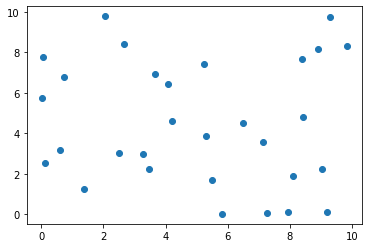

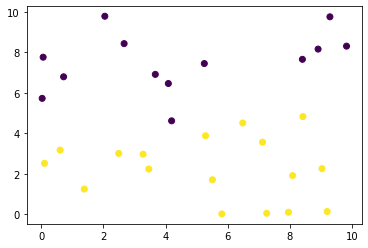

In [392]:
#Generate new points
#Create Random Points in R^2, between 0,0 and 10,10 
x1_new=10*np.random.random(30)
x2_new=10*np.random.random(30)
plt.scatter(x1_new, x2_new)
plt.show()

y=[]
for pos, x1_elem in enumerate(x1_new):
    x2_elem=x2_new[pos]
    res= m*x1_elem - x2_elem + n
    if(res>=0):
        y.append(1)
    else:
        y.append(-1)

#First let separate the success form failure, to make it easier to plot
x1_success_new=[]
x2_success_new=[]
x1_failure_new=[]
x2_failure_new=[]
for pos, y_elem in enumerate(y):
    if(y_elem==1):
        x1_success_new.append(x1_new[pos])
        x2_success_new.append(x2_new[pos])
    else:
        x1_failure_new.append(x1_new[pos])
        x2_failure_new.append(x2_new[pos])
        
plt.scatter(x1_new, x2_new, c=y)
plt.show()

dic_new={'x1': x1_new, 'x2': x2_new, 'y':y}
df_new=pd.DataFrame(data=dic_new)


In [393]:
#Now we test the new points

#Execute the perceptron
predicted = df_new.apply(lambda elem: perceptron(elem['x1'],elem['x2']),axis=1)
#print(predicted)
#Add the predicted values to the dataframe
df_new["predicted"]=predicted
#print(df_new)

#Execute the evaluation and add it to the dataframe
result = df_new.apply(lambda elem: eval_res(elem['y'],elem['predicted']),axis=1)
df_new["result"]=result
#print(df_new)

#Count the number of each cases
case_count=df_new.result.value_counts()
#If an option does not appear we catch the exception, and we add a 0
res=[]
try:
    res.append(case_count.at[0])
except KeyError:
    res.append(0)

try:
    res.append(case_count.at[1])
except KeyError:
    res.append(0)

try:
    res.append(case_count.at[2])
except KeyError:
    res.append(0)

try:
    res.append(case_count.at[3])
except KeyError:
    res.append(0)


#Calculate the accuracy
accuracy= (res[0]+res[3]) / (res[0]+res[1]+res[2]+res[3]) * 100
    
#Print the Confusion Matrix and the Accuracy
print(res)
print("|----------------|-----------------------|-----------------------|")
print("|\t\t |\t Actual +1\t |\t Actual −1\t |")
print("|----------------|-----------------------|-----------------------|")
print("|Predicted +1 \t |\t " +str(res[0])+ "\t\t |\t " + str(res[1])+"\t\t |")
print("|----------------|-----------------------|-----------------------|")
print("|Predicted -1 \t |\t " +str(res[2])+ "\t\t |\t " + str(res[3])+"\t\t |")
print("|----------------|-----------------------|-----------------------|")
print("")
print("Accuracy: " + str(accuracy) + " %")

[17, 0, 0, 13]
|----------------|-----------------------|-----------------------|
|		 |	 Actual +1	 |	 Actual −1	 |
|----------------|-----------------------|-----------------------|
|Predicted +1 	 |	 17		 |	 0		 |
|----------------|-----------------------|-----------------------|
|Predicted -1 	 |	 0		 |	 13		 |
|----------------|-----------------------|-----------------------|

Accuracy: 100.0 %


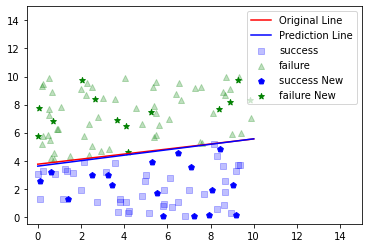

In [401]:
#Plot everything into a graph


success=plt.scatter(x1_success, x2_success, c="b", marker="s",label="success",alpha=0.25)
failure=plt.scatter(x1_failure, x2_failure, c="g", marker="^",label="failure",alpha=0.25)
line=plt.plot([p1x,p2x],[p1y,p2y],c="r", label="Original Line")

success_new=plt.scatter(x1_success_new, x2_success_new, c="b", marker="p",label="success New",alpha=1)
failure_new=plt.scatter(x1_failure_new, x2_failure_new, c="g", marker="*",label="failure New",alpha=1)
line_new=plt.plot([p1x_new,p2x_new],[p1y_new,p2y_new],c="b" , label= "Prediction Line")

plt.legend()
plt.xlim(-0.5,15)
plt.ylim(-0.5,15)
plt.show()